# Iris Report
The iris dataset is one of the best known datasets in statistics.
This example notebook shows how we can put together a simple data analysis report.


Specifically we will look at
* Text content with markdown formatting
* Converting a Pandas DataFrame to a table
* Adding plots from Matplotlib

In [1]:
# Environment setup
import os
!pip install -Uqq esparto weasyprint==52.5
if os.environ.get("BINDER_SERVICE_HOST"):
    !pip install -Uqq pandas matplotlib

In [2]:
import esparto as es
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
es.__version__

'3.0.0'

We start by instantiating a Page object that we will add content to.

In [4]:
my_page = es.Page(title="Iris Report")

## Text with Markdown Formatting
The text for this report has been taken from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).
Note that the text contains markdown formatting that will be converted to HTML when it is rendered.

In [5]:
intro = """
The **Iris flower** data set, or Fisher's Iris data set, is a multivariate data set introduced by 
the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper 
'The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis'. 
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify 
the morphologic variation of Iris flowers of three related species. Two of the three species were 
collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at 
the same time by the same person with the same apparatus".
"""
                    

credits = """\
<small><i>
Text retrieved from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) on 2021-04-05  
License: [CC-BY-SA-3.0](https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License)  
</i></small>
"""

In [6]:
my_page["Introduction"] = intro
my_page.introduction

{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']}]}]}

To add additional content without a title we use the `+=` method to append in place.

In [7]:
my_page.introduction += credits
my_page.introduction

{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']}]},
                  {'Row 1': [{'Column 0': ['Markdown']}]}]}

## Pandas DataFrame
For the Analysis section we will include a Pandas DataFrame and a scatter plot from MatplotLib.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sample_df = df.sample(10, random_state=1)

## Plotting with Matplotlib

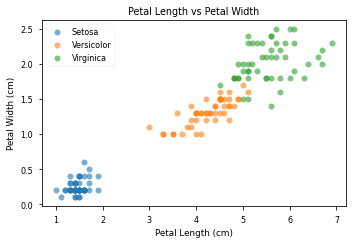

In [9]:
plt.style.use("seaborn-paper")

fig, ax = plt.subplots(figsize=(5, 3.5))

df["species"] = df.species.astype("category")

for i, s in enumerate(df.species.cat.categories):
    plot_data = df.loc[df.species == s]
    ax.scatter(plot_data.petal_length, plot_data.petal_width, c=f"C{i}", alpha=0.6, label=s.capitalize())

ax.set_title("Petal Length vs Petal Width")
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")
ax.legend()

fig.tight_layout();

In [10]:
my_page["Analysis"][0] = fig
my_page["Analysis"][1] = sample_df

## Checking the Finished Page

We can preview the final page rendering within the notebook.

In [11]:
my_page

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


{'Iris Report': [{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']}]},
                                   {'Row 1': [{'Column 0': ['Markdown']}]}]},
                 {'Analysis': [{'Row 0': [{'Column 0': ['FigureMpl']}]},
                               {'Row 1': [{'Column 0': ['DataFramePd']}]}]}]}

The page can now be saved as HTML or PDF.

In [12]:
my_page.save_html("iris-report.html")
my_page.save_pdf("iris-report.pdf")